# ¿Podemos aproximar la cantidad de baños según la antigüedad y el tamaño en metros cuadrados del inmueble?

Analizamos calidad de los datos

In [1]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/home/schlotty/Documents/mn/metodos-num/tp3/notebooks
Python 3.6.9


In [4]:
#crea una matriz la cual tiene cada feature en sus columnas


def crearPhi(features, data , label):
    vals = []
    for f in features: 
        x = data[f].dropna().values
        x /= np.linalg.norm(x)
        vals.append(x)
    
    
    y = data[label].dropna().values 
    
    sinNan = min(len(y) , min([len(s) for s in vals ]))
    y = y[:sinNan]
    y = y.reshape(len(y),1) 
    
    X = np.zeros((sinNan,len(features)))
    
    for i in range (len(features) ):
        X[:,i] = vals[i][:sinNan]
    
      
    return X, y
    

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error ,mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures


def cross_val(X, y, linear_regressor, k, func = "Poly",grado = 3):
    
    RMSE = []
    RMSLE= []
    
    kf = KFold(n_splits=k,shuffle = False)
    i = 1
    
    if (func == "Poly"):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        linear_regressor.fit(X_train,y_train)

        y_pred = linear_regressor.predict(X_test)


        rmse= np.sqrt(mean_squared_error(y_test, y_pred))
        rmsle = mean_squared_log_error(y_test, y_pred)

        RMSE.append(rmse)
        RMSLE.append(rmsle)
        i += 1
    

    return RMSE,RMSLE

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error ,mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures


def cross_val_soloRMSE(X, y, linear_regressor, k, func = "Poly",grado = 3):
    
    RMSE = []
    
    kf = KFold(n_splits=k,shuffle = False)
    i = 1
    
    if (func == "Poly"):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        linear_regressor.fit(X_train,y_train)

        y_pred = linear_regressor.predict(X_test)


        rmse= np.sqrt(mean_squared_error(y_test, y_pred))

        RMSE.append(rmse)
        i += 1
    

    return RMSE

In [4]:
#cuantos elementos faltan para cada caracteristica?
df = pd.read_csv('../data/train.csv')
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [5]:

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

No handles with labels found to put in legend.


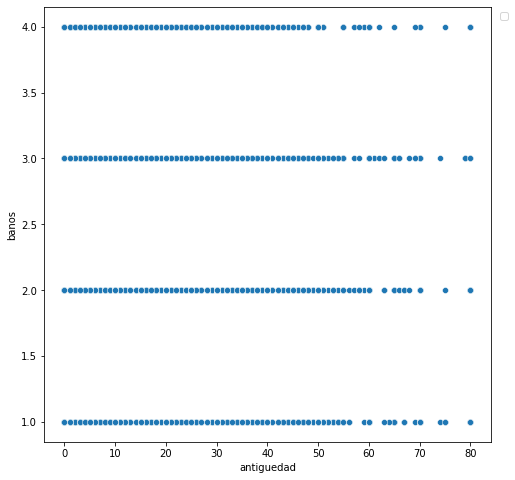

No handles with labels found to put in legend.


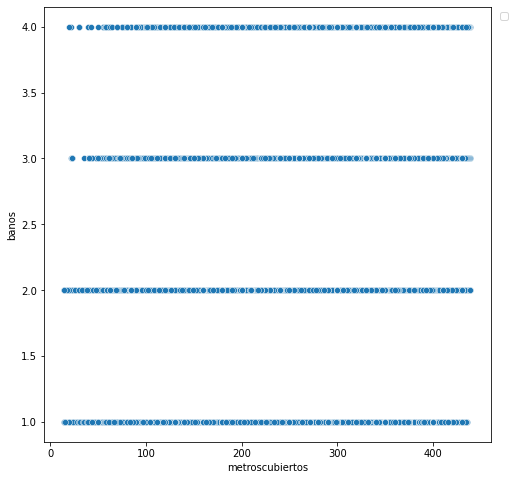

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "metroscubiertos", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Notamos un indicio de relacion entre metros cubiertos y la cantidad de banios. No sucede lo mismo con antiguedad.

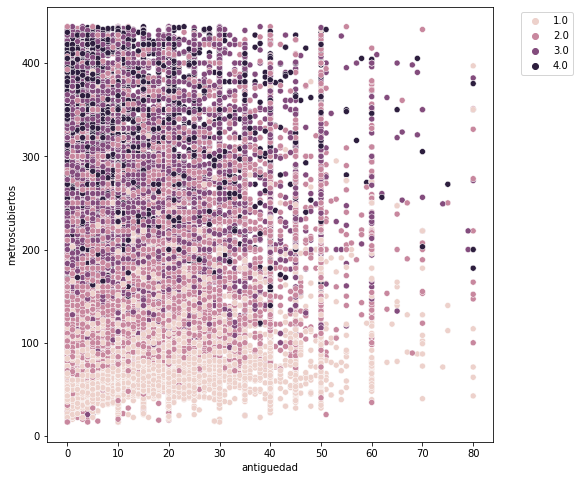

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174890 entries, 1 to 239999
Data columns (total 23 columns):
id                            174890 non-null int64
titulo                        170730 non-null object
descripcion                   173714 non-null object
tipodepropiedad               174884 non-null object
direccion                     153912 non-null object
ciudad                        174771 non-null object
provincia                     174866 non-null object
antiguedad                    174890 non-null float64
habitaciones                  171827 non-null float64
garages                       154461 non-null float64
banos                         174890 non-null float64
metroscubiertos               174890 non-null float64
metrostotales                 135997 non-null float64
idzona                        160533 non-null float64
lat                           86189 non-null float64
lng                           86189 non-null float64
fecha                         17489

In [19]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
X.shape

(174890, 2)

In [20]:
gradoPoly = 2
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
X.shape           

(174890, 6)

In [23]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()

gradoPoly = 2
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)


rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6172595106476712

Mean Absolute Error :0.48014723178542207



 Accuracy : 0.6136142718280062


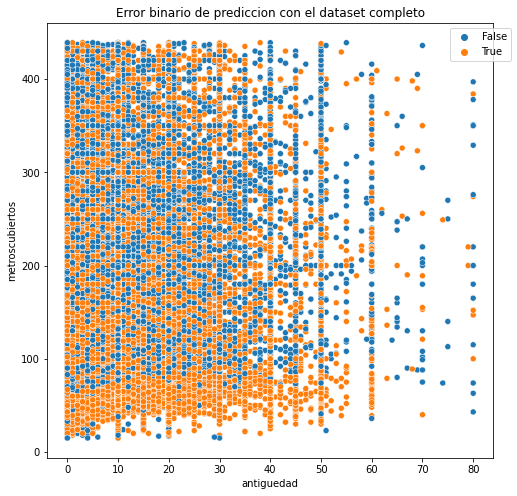

In [24]:
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue =boolpred )
plt.title("Error binario de prediccion con el dataset completo")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


# Hacemos cross validation sobre el dataset completo

Probamos dejando las caracteristicas lineales y polinomios de grado 3 

In [17]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")


Root Mean Squared Error :0.8113935489623515

Root Mean Squared Log Error :0.07093179439582362



In [18]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6158778695211771

Root Mean Squared Log Error :0.038729169377751935



# Segmentamos por tipo de propiedad, dividiendo los inmuebles en Domicilio y no Domicilio

In [31]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

In [80]:
df["tipodepropiedad"].unique()

array(['Casa en condominio', 'Casa', 'Apartamento', 'Quinta Vacacional',
       'Local Comercial', 'Casa uso de suelo',
       'Local en centro comercial', 'Oficina comercial',
       'Bodega comercial', 'Villa', 'Duplex', 'Terreno',
       'Terreno comercial', 'Departamento Compartido', 'Nave industrial',
       'Rancho', 'Edificio', nan, 'Inmuebles productivos urbanos',
       'Otros', 'Huerta', 'Terreno industrial'], dtype=object)

In [19]:
Domicilio = ['Casa en condominio', 'Casa', 'Apartamento', 'Quinta Vacacional',
        'Casa uso de suelo',
        'Villa', 'Duplex',
        'Departamento Compartido','Rancho', 'Edificio']

In [33]:
df = df[df.tipodepropiedad.isin(Domicilio)]

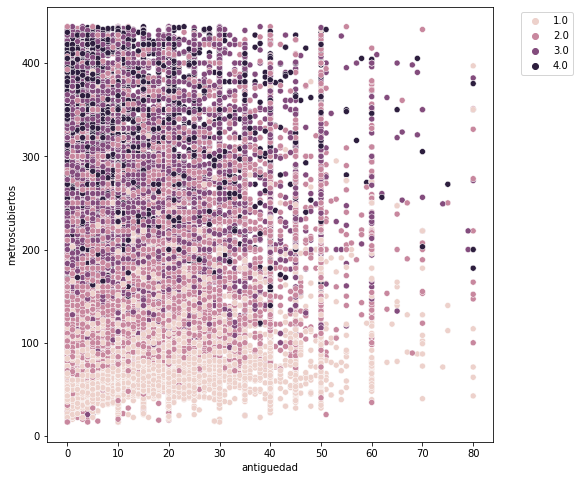

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

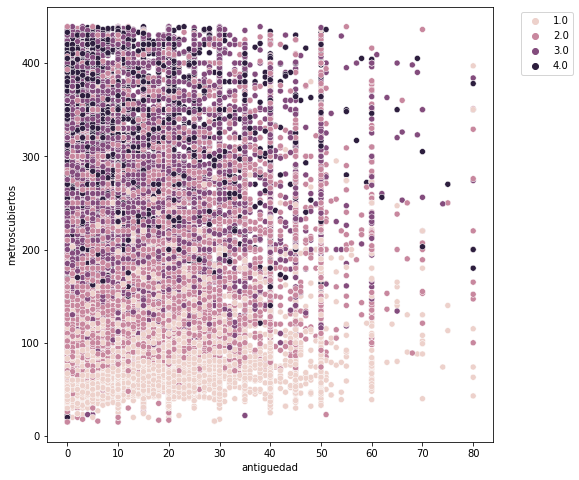

In [34]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172139 entries, 1 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          172139 non-null  int64  
 1   titulo                      168034 non-null  object 
 2   descripcion                 170984 non-null  object 
 3   tipodepropiedad             172139 non-null  object 
 4   direccion                   151671 non-null  object 
 5   ciudad                      172026 non-null  object 
 6   provincia                   172116 non-null  object 
 7   antiguedad                  172139 non-null  float64
 8   habitaciones                171084 non-null  float64
 9   garages                     152527 non-null  float64
 10  banos                       172139 non-null  float64
 11  metroscubiertos             172139 non-null  float64
 12  metrostotales               134195 non-null  float64
 13  idzona        

In [22]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.8032172332183964

Root Mean Squared Log Error :0.06920750587352839



In [11]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6087741373963863

Root Mean Squared Log Error :0.037729841437458216



# Vemos lo no Domicilio

In [24]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

In [25]:
df = df[-df.tipodepropiedad.isin(Domicilio)]

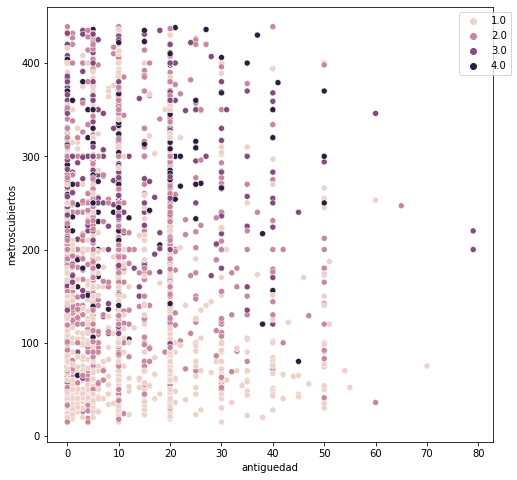

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [27]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :1.0351091539222268

Root Mean Squared Log Error :0.13766535549113837



In [28]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.8476363621252506

Root Mean Squared Log Error :0.07799601018004435



# Nos enfocamos en los inmuebles pertenecientes a Domicilio

In [58]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

In [59]:
Domicilio = ['Casa en condominio', 'Casa', 'Apartamento', 'Quinta Vacacional',
        'Casa uso de suelo',
        'Villa', 'Duplex',
        'Departamento Compartido','Rancho', 'Edificio']

In [60]:
df = df[df.tipodepropiedad.isin(Domicilio)]

<AxesSubplot:xlabel='count', ylabel='tipodepropiedad'>

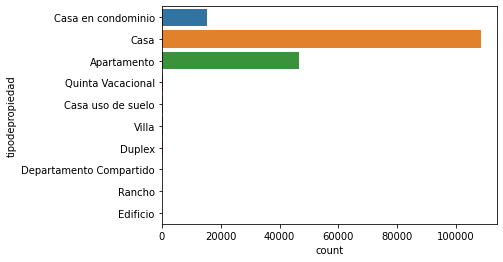

In [61]:
sns.countplot(data = df , y = "tipodepropiedad")

In [62]:
casitas = ['Casa en condominio', 'Casa','Casa uso de suelo','Quinta Vacacional','Rancho']

In [63]:
df = df[df.tipodepropiedad.isin(casitas)]

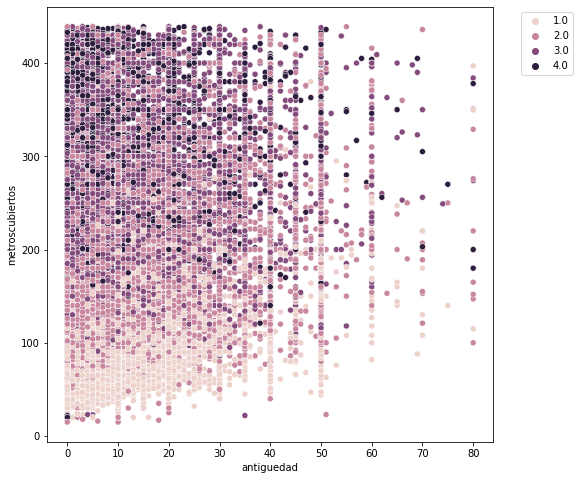

In [64]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [66]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.8196789169983809

Root Mean Squared Log Error :0.06830208948560748



In [67]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6474594065649381

Root Mean Squared Log Error :0.04090881406786983



# Vemos NO casitas

In [54]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]
df = df[-df.tipodepropiedad.isin(casitas)]

In [55]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.7365460095757633

Root Mean Squared Log Error :0.06194569509594453



In [56]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.5173182319182618

Root Mean Squared Log Error :0.03169611661143407



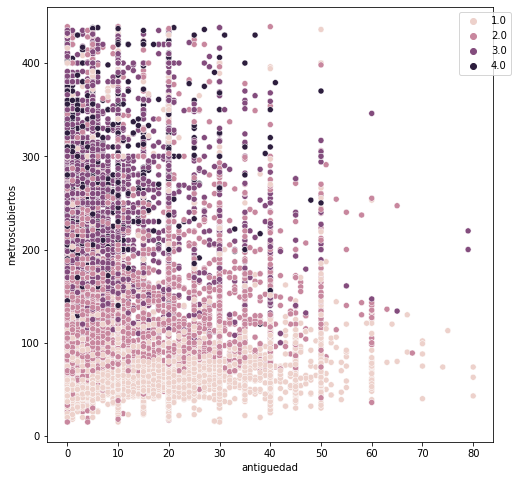

In [57]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Seguimos segmentando a los inmuebles por casitas

In [263]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

#eliminamos los inmuebles que no tengan el feature habitaciones
filtNull = df["habitaciones"].notnull()
df = df[filtNull]



In [264]:
casitas = ['Casa en condominio', 'Casa','Casa uso de suelo','Quinta Vacacional','Rancho']
df = df[df.tipodepropiedad.isin(casitas)]

# Segmentamos por <=  2 habitaciones

In [170]:
filtroHab = df["habitaciones"]  <= 2
df = df[filtroHab]

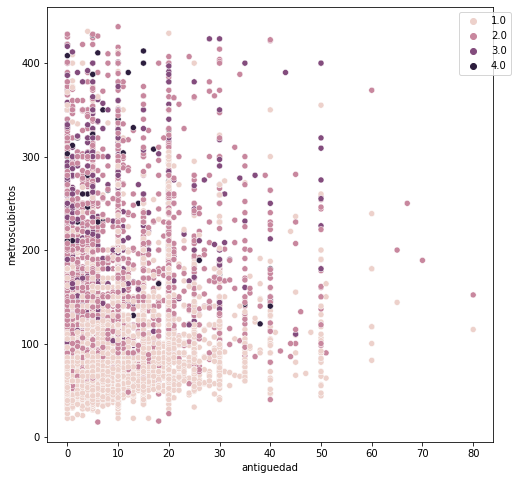

In [171]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [172]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR= cross_val_soloRMSE(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))

print(f"Root Mean Squared Error :{meanRMSE}\n")


Root Mean Squared Error :0.4441459368390387



In [173]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6047913758960755

Root Mean Squared Log Error :0.05807603825616324



# Vemos las "casitas" con mas de 2 habitaciones

In [251]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

#eliminamos los inmuebles que no tengan el feature habitaciones
filtNull = df["habitaciones"].notnull()
df = df[filtNull]

df = df[df.tipodepropiedad.isin(casitas)]

In [252]:
casitas = ['Casa en condominio', 'Casa','Casa uso de suelo','Quinta Vacacional','Rancho']
df = df[df.tipodepropiedad.isin(casitas)]

<AxesSubplot:xlabel='habitaciones', ylabel='count'>

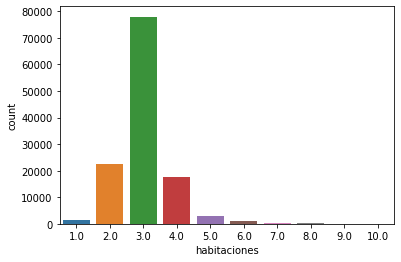

In [253]:
sns.countplot(data = df,x = "habitaciones")

In [254]:
#filtroHab = (3 >= df["habitaciones"]) & (df["habitaciones"]  > 2)

filtroHab = (3 <= df["habitaciones"]) &(df["habitaciones"] < 7)

df = df[filtroHab]

<AxesSubplot:xlabel='habitaciones', ylabel='count'>

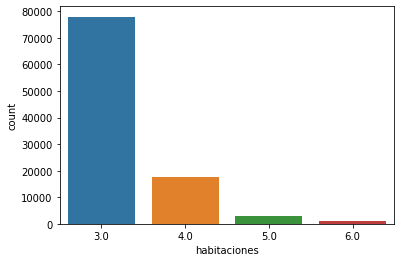

In [255]:
sns.countplot(data = df,x = "habitaciones")

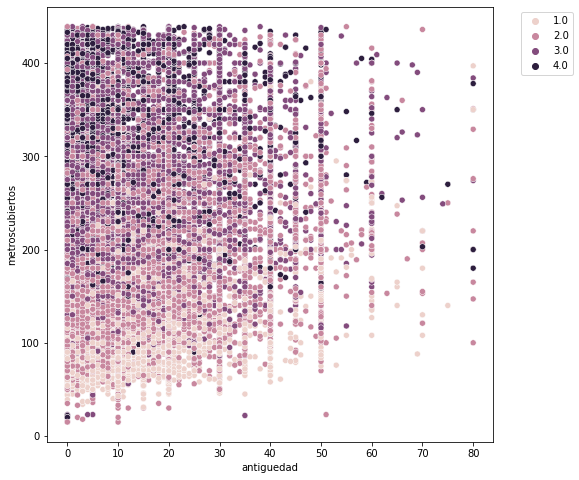

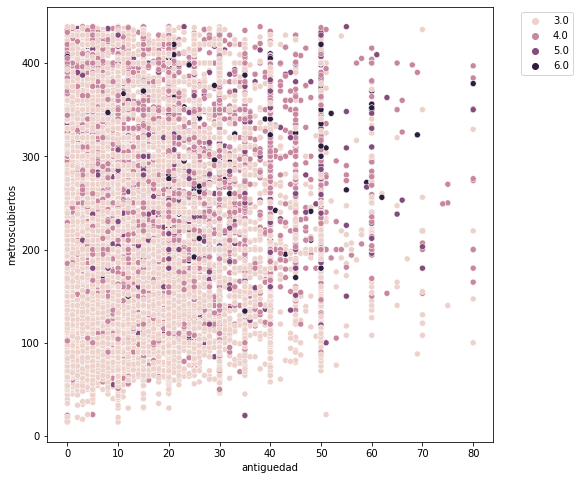

In [256]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='habitaciones',cmap= 'red' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

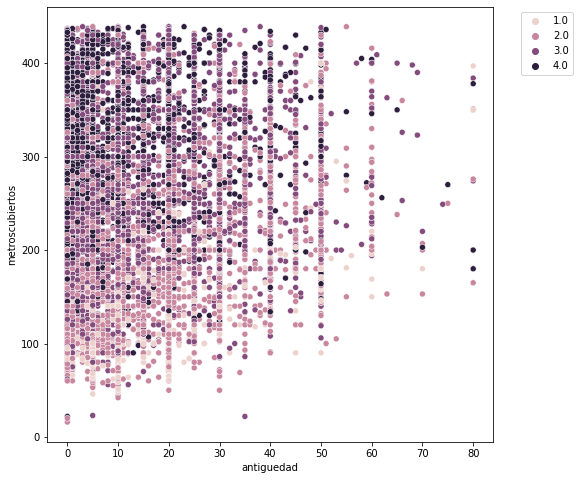

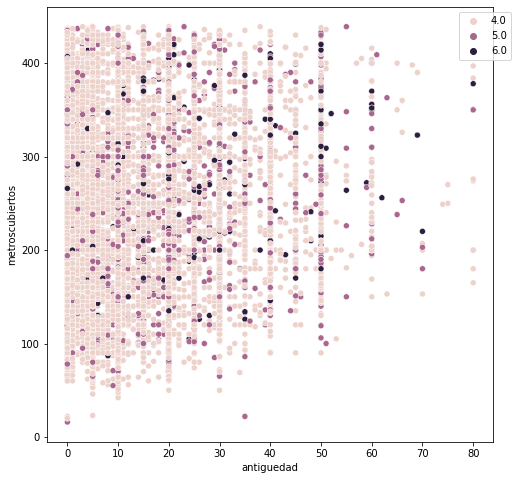

In [257]:
filt = (3 != df["habitaciones"])

plt.figure(figsize=(8,8))
sns.scatterplot(data = df[filt], x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[filt], x = "antiguedad", y = "metroscubiertos",hue ='habitaciones',cmap= 'red' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [244]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR= cross_val_soloRMSE(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))

print(f"Root Mean Squared Error :{meanRMSE}\n")


Root Mean Squared Error :0.6671023769050672



In [245]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,func = "lineal")
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.8574927643548232

Root Mean Squared Log Error :0.06935570800275555



In [28]:
def train(df,poly = True,grado = 3):

    
    X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
    linear_regressor = metnum.LinearRegression()
    
    if(poly):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)

    linear_regressor.fit(X,y_true)

    return linear_regressor

def test(df,linear_regressor,poly = True,grado = 3):
    
    X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")

    if(poly):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)
    
    y_pred = linear_regressor.predict(X)
    
    rmse= np.sqrt(mean_squared_error(y_true, y_pred))
    print("Polynomial Function")
    print(f"Root Mean Square Error :{rmse}\n")    
    return y_pred

In [48]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

#eliminamos los inmuebles que no tengan el feature habitaciones
filtNull = df["habitaciones"].notnull()
df = df[filtNull]
casitas = ['Casa en condominio', 'Casa','Casa uso de suelo','Quinta Vacacional','Rancho']

df = df[df.tipodepropiedad.isin(casitas)]

filtroHab = df["habitaciones"]  <= 2


In [49]:
len(df)

123759

In [63]:
dfHab = df[filtroHab]
len(dfHab)

(23901, 4801)

In [64]:
top = 19100
predictorFiltrado = train(dfHab[:top])
testset = dfHab[top:]
prediccion = test(testset,predictorFiltrado)

Polynomial Function
Root Mean Square Error :0.8451973488300267



# Utilizamos antigüedad y metroscubiertos para predecir #banos segmentando por Provincia de Yucatan

In [79]:
df["usosmultiples"].unique()

array([0., 1.])

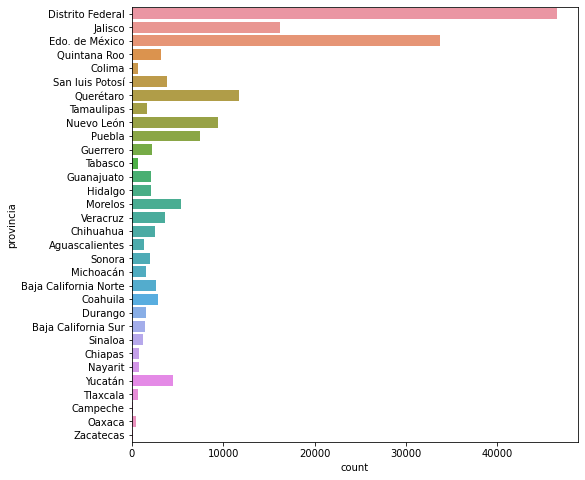

In [78]:
plt.figure(figsize=(8,8))

sns.countplot( data = df  ,y =  "provincia")

plt.show()

In [3]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]


In [4]:
df = df[df['provincia'] == 'Yucatán']

In [21]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6348258235434426

Mean Absolute Error :0.5088306948917826



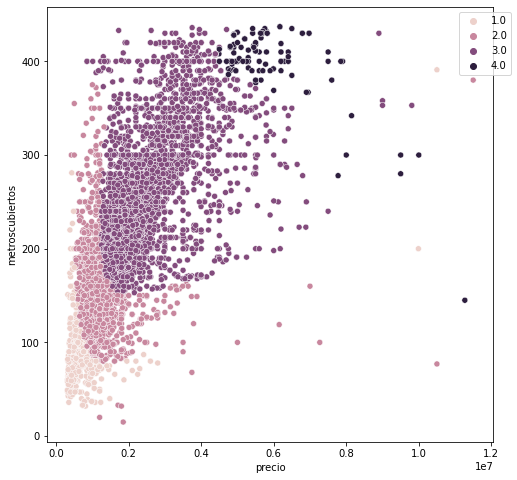

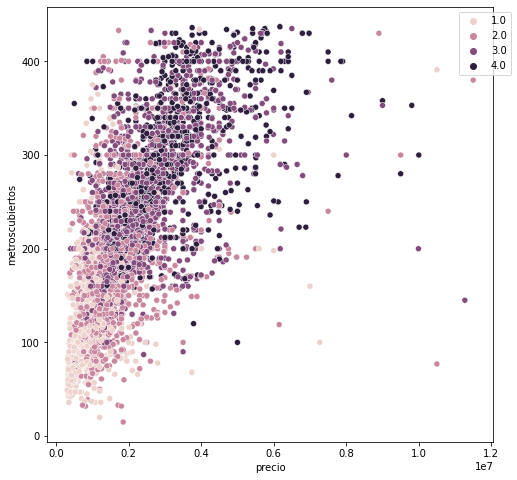

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

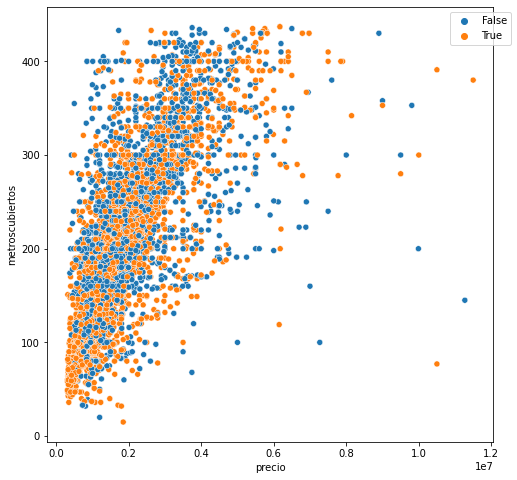

In [18]:
boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

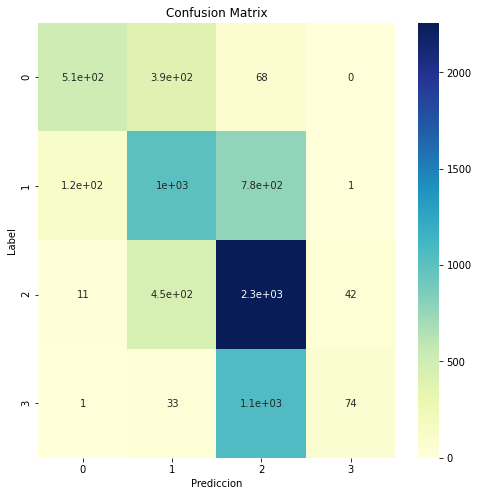

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true.reshape(-1),np.around(y_pred).reshape(-1))
plt.figure(figsize=(8,8))
sns.heatmap(cm,cmap = "YlGnBu",annot = True)
plt.title("Confusion Matrix")

plt.xlabel("Prediccion")
plt.ylabel("Label")
plt.show()

# Segmentamos todavia mas chau cuatro banios con menos estas bien

In [23]:
df = df[df['banos'] < 4.]

In [24]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5203122886169889

Mean Absolute Error :0.4179789330730125



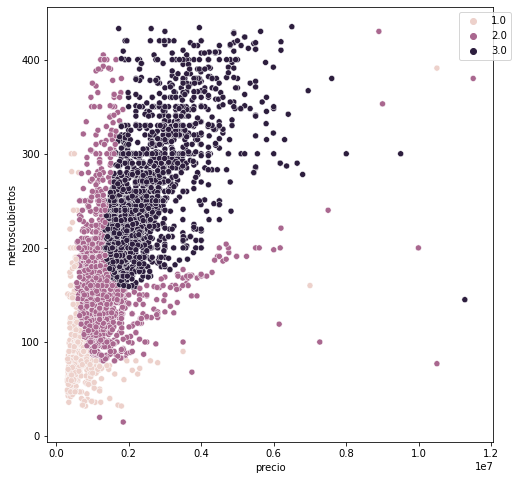

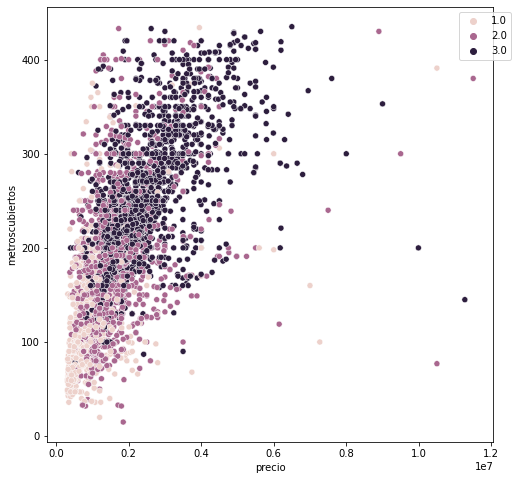

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.6695683069817019


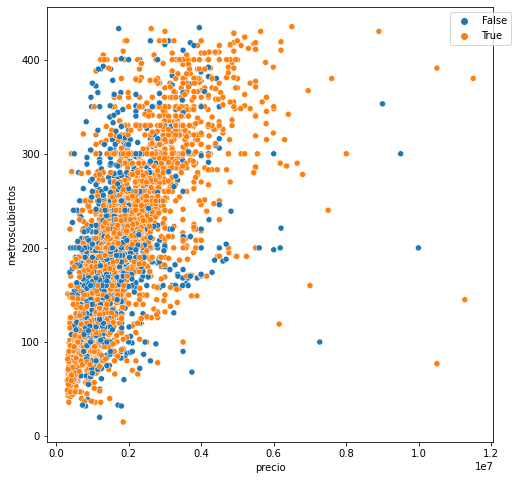

In [34]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos todavia mas chau tres banios con menos estas bien

In [36]:
df = df[df['banos'] < 3.]

In [37]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.3697142531091898

Mean Absolute Error :0.2774592457045498



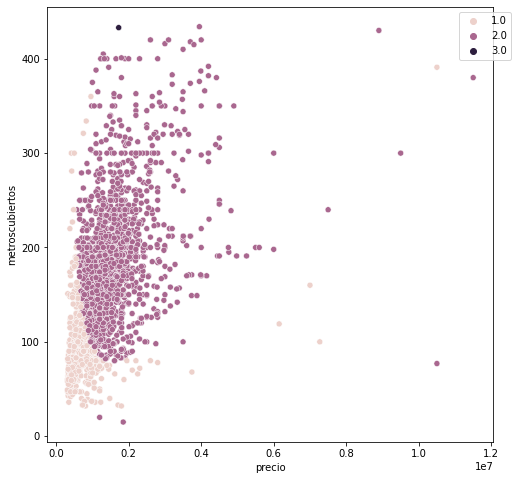

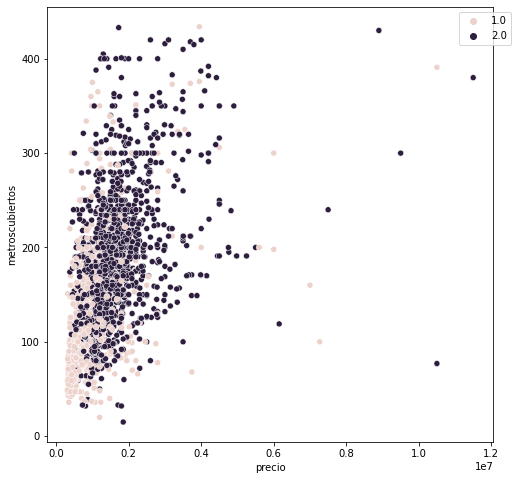

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.8013245033112583


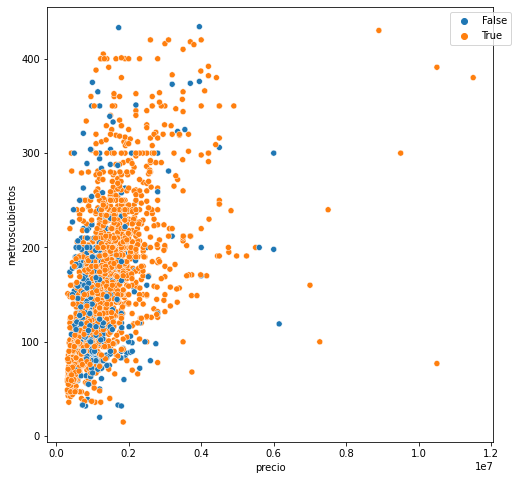

In [40]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos por ciudades de Yucatan

In [42]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']

In [46]:
len(df["ciudad"].unique())

35

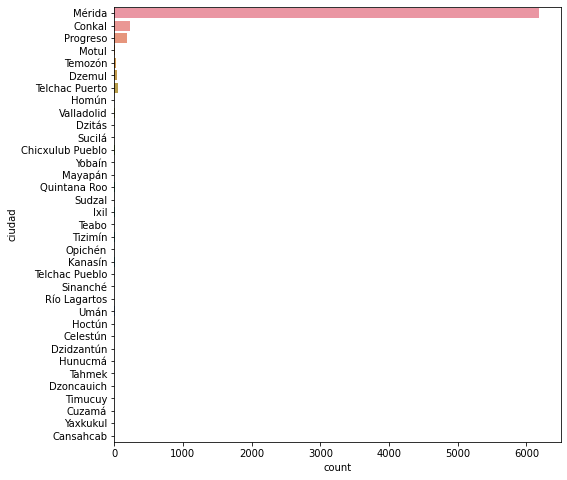

In [49]:
plt.figure(figsize=(8,8))
chart = sns.countplot(data = df, y = "ciudad")
#chart.set_xticklabels(chart.get_yticklabels(), rotation=90, horizontalalignment='right')

plt.show()

# Elegimos merida por ser la que mas inmuebles tiene en el dataset

In [50]:
df = df[df['ciudad'] == 'Mérida']

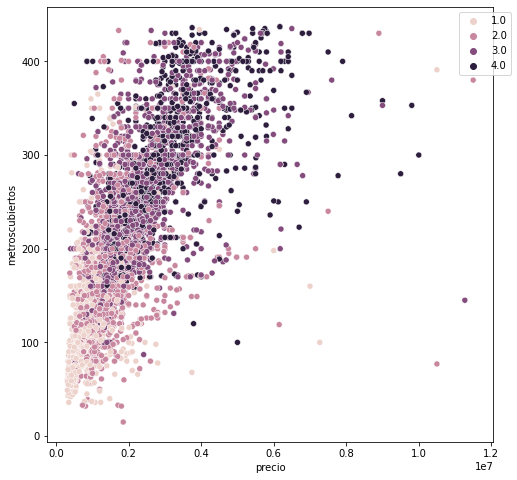

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

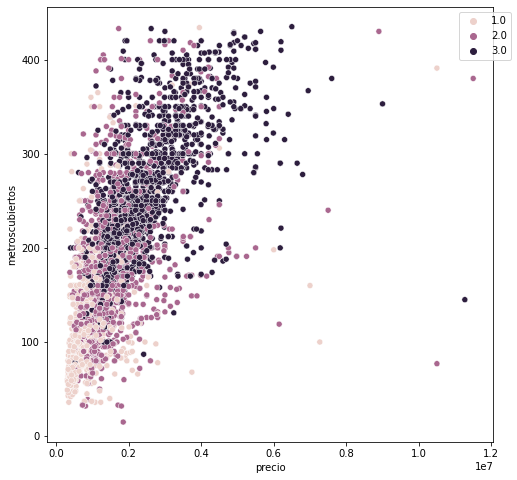

In [53]:
df = df[df['banos'] < 4]

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [54]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5138074531171324

Mean Absolute Error :0.41039784592406453



# No le habia sumado metrostotales vamos con esa REYY(Yucatan)

In [56]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metrostotales"].notnull()
df = df[filtNull]
filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]

# No parece haber ningun cambio

In [57]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5210474221730538

Mean Absolute Error :0.4183337687971789



# Servira segmentar por inmueble?

In [63]:

df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']


#df = df[df["tipodepropiedad"] == "Apartamento"]

Text(0.5, 0, 'tipodepropiedad')

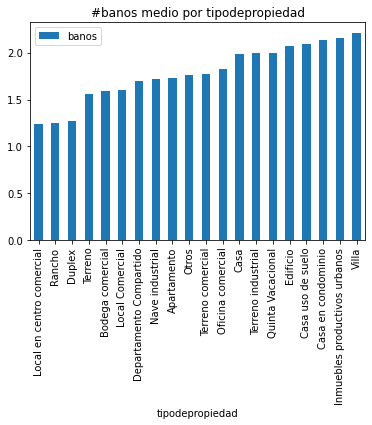

In [58]:

df_provinces = df.groupby(['tipodepropiedad']).mean().sort_values(by = 'banos')
ax = df_provinces.plot.bar(y = 'banos')
ax.set_title('#banos medio por tipodepropiedad')
ax.set_xlabel('tipodepropiedad')

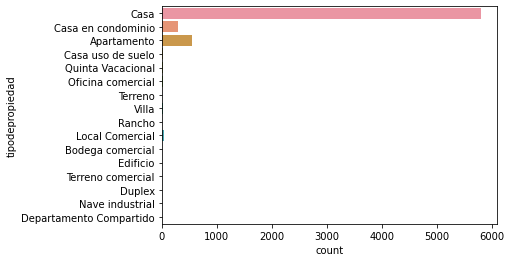

<AxesSubplot:xlabel='count', ylabel='tipodepropiedad'>

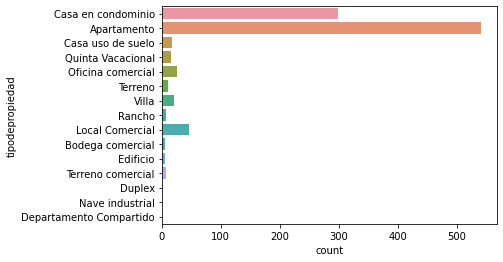

In [84]:
sns.countplot(data = df , y = "tipodepropiedad")
plt.show()
sns.countplot(data = df[df["tipodepropiedad"] != "Casa"] , y = "tipodepropiedad")

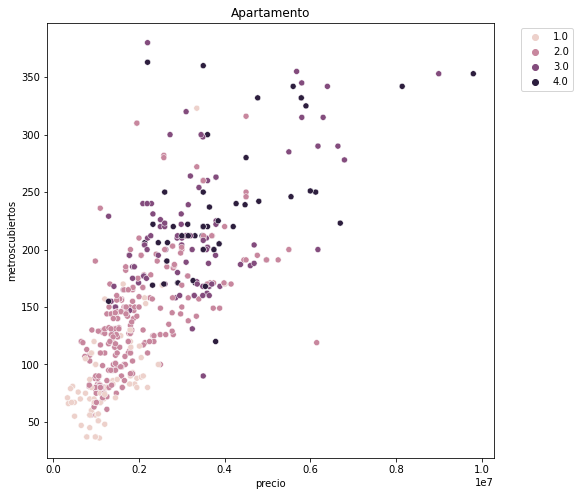

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Apartamento"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Apartamento")
plt.show()

In [64]:
df["banos"].unique()

array([4., 1., 3., 2.])

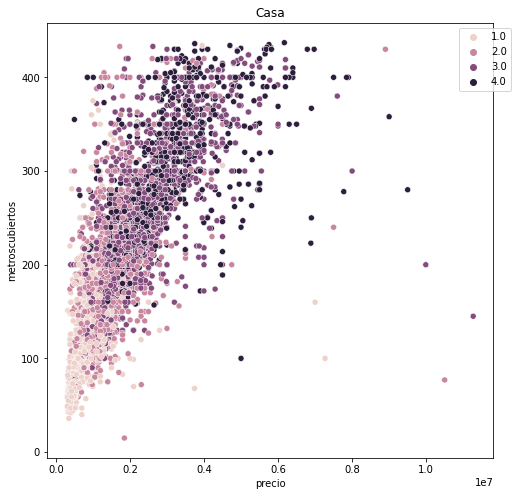

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Casa"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Casa")
plt.show()

<AxesSubplot:xlabel='banos', ylabel='tipodepropiedad'>

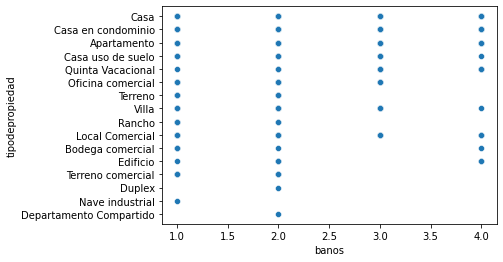

In [86]:
sns.scatterplot(data = df, y = "tipodepropiedad", x = "banos")

# Nos concentramos en Yucatan con 3 banos que fue lo que mejor funciono pero agregamos algunos features que dieron bien correlacionados para ver si mejora

In [92]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]
df = df[df['provincia'] == 'Yucatán']

In [94]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales','habitaciones','garages'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )


Polynomial Function
Root Mean Square Error :0.4877367680016403

Mean Absolute Error :0.384992385055786

 Accuracy : 0.7060240963855422
